[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Chuvard/Clustering/blob/main/Clustering.ipynb)

## Outline

1. Importing modules
2. Problem Statement
3. Implementing K-means
    * 3.1. Finding closest centroids
        * Exercise 1
    * 3.2. Computing centroid means
        * Exercise 2
4. K-means on a sample dataset
5. Random initialization
6. Image compression with K-means
    * 6.1. Dataset
    * 6.2. K-Means on image pixels
    * 6.3. Compress the image

## 1. Importing modules

First, run the cell below to import the packages we needed:

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import requests
import PIL.Image
import urllib.request
from io import BytesIO

%matplotlib inline

## 2. Problem Statement

We will implement the K-means algorithm and use it for image compression.

We will start with a sample dataset that will help you gain an intuition of how the K-means algorithm works.
After that, we will use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

## 3. Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

We will implement the two phases of the K-means algorithm separately in the next sections. 
* We will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

### 3.1. Finding closest centroids

In the first stage of the K-means algorithm, the algorithm assigns every training example  $ x^{(i)} $  to its closest centroid, given the current positions of centroids.

### Exercise 1

Our task is to complete the code in `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . *(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1)*
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm

In [6]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # We need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    # Iterates over the Xs
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = []
        # Iterates over the Centroids
        for j in range(centroids.shape[0]):
            # Calculate the norm distance between (X[i] - centroids[j])
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
            
        # Calculate index of minimum value in distance
        idx[i] = np.argmin(distance)
    
    return idx

In [7]:
# Create a formula to load the data

def load_data(url):
    response = requests.get(url)
    data = BytesIO(response.content)
    X = np.load(data)
    return X

# URL to load the data
url = 'https://raw.githubusercontent.com/Chuvard/Clustering/main/data/ex7_X.npy'

# Load the data
X = load_data(url)

In [8]:
# The code below prints the first five elements in the variable X and the dimensions of the variable
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [9]:
# Now let's check our implementation using an example dataset and defining initial set of centroids

# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


### 3.2. Computing centroid means

Based on previous assigmented points of $ x^{(i)} $ to centroids now we have to recompute the mean of the points for each centroids that were assigned to it.

### Exercise 2

Now we have to complete the `compute_centroids` function below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
* $C_k$ is the set of examples that are assigned to centroid $k$
* $|C_k|$ is the number of examples in the set $C_k$


Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then we should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [10]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    # Iterates over centroids
    for k in range(K):
        # Obtain a list of all data points in X assigned to centroid k
        points = X[idx == k]
        # Compute the mean of the points assigned
        centroids[k] = np.mean(points, axis=0)
    
    return centroids

In [11]:
# Now check our implementation by running this cell
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## 4. K-means on a sample dataset

After we have completed the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to run the
K-means algorithm on a toy 2D dataset to help understand how
K-means works. 
* We take a look at the function (`run_kMeans`) below to understand how it works.

When we run the code below, it will produce a
visualization that steps through the progress of the algorithm at
each iteration. 
* At the end, our figure should look like the one displayed in Figure 1.
* The final centroids are the black X-marks in the middle of the colored clusters.
* We can see how these centroids got to their final location by looking at the other X-marks connected to it.

<img src="https://raw.githubusercontent.com/Chuvard/Clustering/main/images/figure_1.PNG" width="750" height="750">

In [12]:
# Define a function to draw a line of cluster centroids movement
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

In [13]:
# Define a function to plot data points of X that holds the index of the closest centroid
def plot_data_points(X, idx):
    # Define colormap to match Figure 1
    cmap = ListedColormap(["red", "green", "blue"])
    c = cmap(idx)
    
    # plots data points in X, coloring them so that those with the same index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors=c, linewidth=0.1, alpha=0.7)

In [14]:
# Define a function to plot each of cluster centroids' path after the movement
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

In [15]:
# Define a function to run K-Means algorithm
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


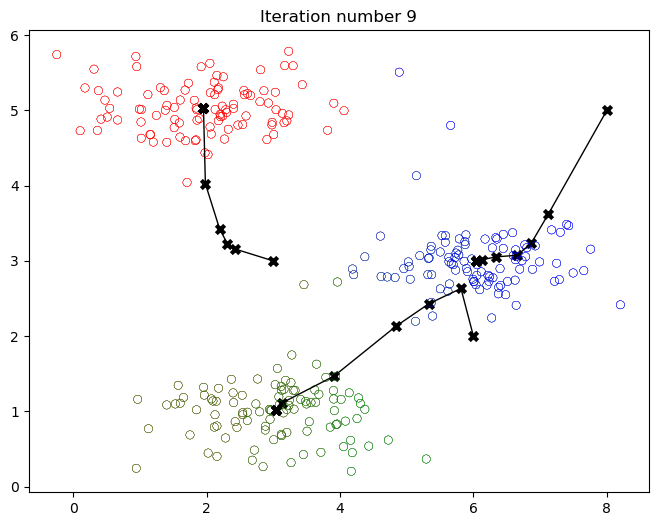

In [16]:
# Load an example dataset
X = load_data(url)

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 5. Random initialization

The initial assignments of centroids for the example dataset was designed so that we will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the training set.

In this part of the exercise, we should understand how the function `kMeans_init_centroids` is implemented.
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.

In [17]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

We can run K-Means again but this time with random initial centroids. Run the cell below several times and observe how different clusters are created based on the initial points chosen.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


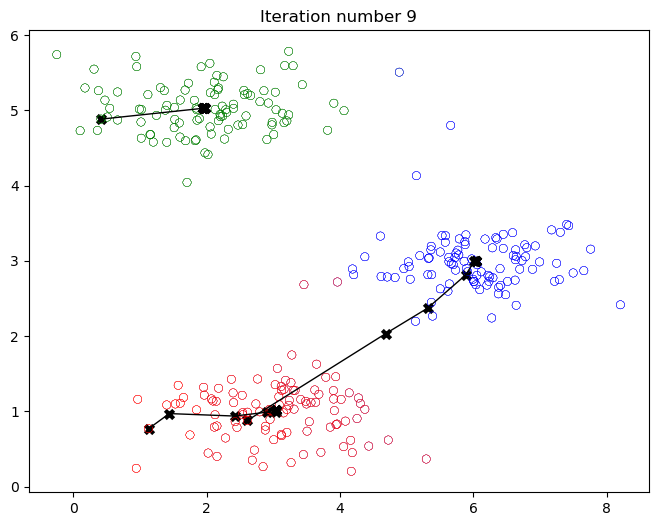

In [18]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 6. Image compression with K-means

In this exercise, we will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, we will reduce the number of colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, we only need to store the RGB values of the 16 selected colors, and for each pixel in the image we now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, we will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, we will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once we have computed the cluster centroids on the image, we will then use the 16 colors to replace the pixels in the original image.

<img src="https://raw.githubusercontent.com/Chuvard/Clustering/main/images/figure_2.PNG" width="500" height="500">

### 6.1. Dataset

#### Load image
First, we will use matplotlib to read in the original image, as shown below.

In [19]:
# Load an image of a bird

# URL to load the data
picture_url = 'https://raw.githubusercontent.com/Chuvard/Clustering/main/images/bird_small.png'

# Load an image of a bird
response = urllib.request.urlopen(picture_url)
original_img = np.array(PIL.Image.open(response))

#### Visualize image

We can visualize the image that was just loaded using the code below.

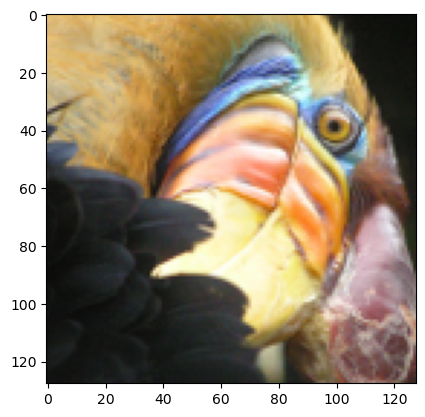

In [20]:
# Visualizing the image
plt.imshow(original_img)

#### Check the dimension of the variable

As always, we will print out the shape of your variable to get more familiar with the data.

In [21]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


As we can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, we need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [22]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

### 6.2. K-Means on image pixels

Now, we can run the cell below to run K-Means on the pre-processed image.

In [23]:
# Run your K-Means algorithm on this data
# We should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function we have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [24]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [4 4 4 4 4]


The code below will plot all the colors found in the original image. As mentioned earlier, the color of each pixel is represented by RGB values so the plot should have 3 axes -- R, G, and B. We'll notice a lot of dots below representing thousands of colors in the original image. The red markers represent the centroids after running K-means. These will be the 16 colors that we will use to compress the image.

In [25]:
# Define a function to color each pixel by RGB values
def plot_kMeans_RGB(X, centroids, idx, K):
    # Plot the colors and centroids in a 3D space
    fig = plt.figure(figsize=(16, 16))
    ax = fig.add_subplot(221, projection='3d')
    ax.scatter(*X.T*255, zdir='z', depthshade=False, s=.3, c=X)
    ax.scatter(*centroids.T*255, zdir='z', depthshade=False, s=500, c='red', marker='x', lw=3)
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')
    ax.w_yaxis.set_pane_color((0., 0., 0., .2))
    ax.set_title("Original colors and their color clusters' centroids")
    plt.show()

C:\Users\Chuva\AppData\Local\Temp\ipykernel_13788\3052787910.py:11: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((0., 0., 0., .2))


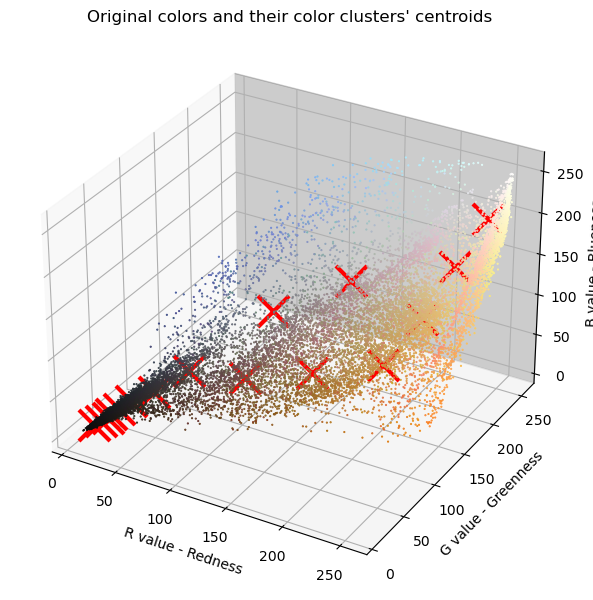

In [26]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

Now we can visualize the colors at each of the red markers (i.e. the centroids) above with the function below. We will only see these colors when generating the new image in the next section. The number below each color is its index and these are the numbers we see in the idx array.

In [27]:
# Define a function to show the palette of 16 colors to replace the original colors
def show_centroid_colors(centroids):
    palette = np.expand_dims(centroids, axis=0)
    num = np.arange(0,len(centroids))
    plt.figure(figsize=(16, 16))
    plt.xticks(num)
    plt.yticks([])
    plt.imshow(palette)

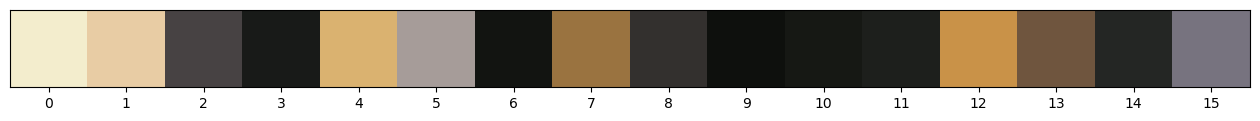

In [28]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

### 6.3. Compress the image

After finding the top $K=16$ colors to represent the image, we can now assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows us to represent the original image using the centroid assignments of each pixel. 
* Notice that we have significantly reduced the number of bits that are required to describe the image. 
    * The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. 
    * The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
    * The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [29]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, we can view the effects of the compression by reconstructing the image based only on the centroid assignments. 
* Specifically, we replaced each pixel with the value of the centroid assigned to it. 
* Figure 3 shows a sample reconstruction. Even though the resulting image retains most of the characteristics of the original, we will also see some compression artifacts because of the fewer colors used.

<img src="https://raw.githubusercontent.com/Chuvard/Clustering/main/images/figure_3.PNG" width="800" height="700">

* Run the code below to see how the image is reconstructed using the 16 colors selected earlier.

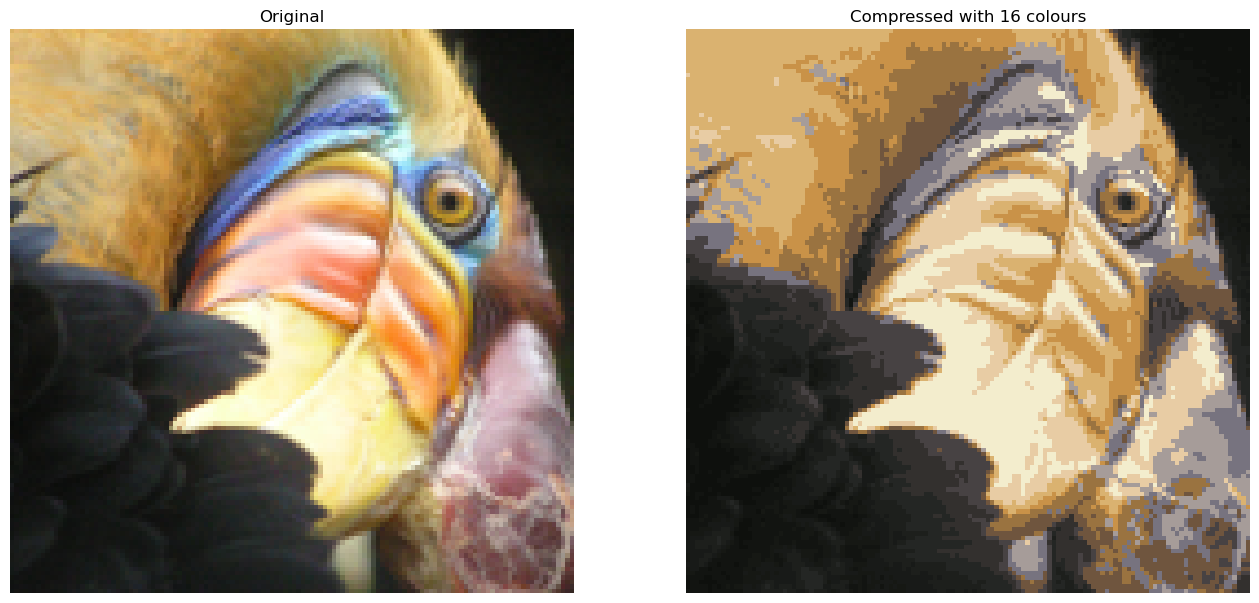

In [30]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()